In [2]:
import pandas as pd
from os import chdir
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
chdir('/Users/jonathanbeaulieu/Desktop/Data_processing/Kickstarter')

In [3]:
df = pd.read_pickle('./KS_df_clean_partiel.zip')
df.sort_index(inplace=True)
df['deadline'] = pd.to_datetime(df['deadline'], unit='s')
df.drop_duplicates(subset='blurb', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187226 entries, 2009-04-21 17:35:35 to 2018-12-13 01:00:37
Data columns (total 29 columns):
backers_count               187226 non-null int64
blurb                       187225 non-null object
category                    187226 non-null object
converted_pledged_amount    187226 non-null int64
country                     187226 non-null object
creator                     187226 non-null object
currency                    187226 non-null object
currency_symbol             187226 non-null object
currency_trailing_code      187226 non-null bool
current_currency            187226 non-null object
deadline                    187226 non-null datetime64[ns]
disable_communication       187226 non-null bool
friends                     122 non-null object
fx_rate                     187226 non-null float64
goal                        187226 non-null float64
id                          187226 non-null int64
is_starrable                187226 non-

In [4]:
df.category.head()

created_at
2009-04-21 17:35:35    {"id":40,"name":"Indie Rock","slug":"music/ind...
2009-04-22 02:11:10    {"id":38,"name":"Electronic Music","slug":"mus...
2009-04-23 03:06:59    {"id":13,"name":"Journalism","slug":"journalis...
2009-04-23 19:27:31    {"id":40,"name":"Indie Rock","slug":"music/ind...
2009-04-24 16:01:40    {"id":17,"name":"Theater","slug":"theater","po...
Name: category, dtype: object

In [5]:
"""
Archive de code de phase 1 de clean up sur ordi personnel de Jo
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s')
df['deadline'] = pd.to_datetime(df['deadline'], unit='s')

df.set_index('created_at', inplace=True)
"""

"\nArchive de code de phase 1 de clean up sur ordi personnel de Jo\ndf['created_at'] = pd.to_datetime(df['created_at'], unit='s')\ndf['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')\ndf['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s')\ndf['deadline'] = pd.to_datetime(df['deadline'], unit='s')\n\ndf.set_index('created_at', inplace=True)\n"

In [6]:
# Archive de code de phase 1 de clean up sur ordi personnel de Jo
col = ['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_starrable', 'is_starred', 'launched_at', 'location', 'name',
       'pledged', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type']

Note de Regex
\w+(?=/) #Selectionne le mot devant le '/'
\D+(?=/) #Sélectionne tout avant '/'
\D+(?=/)|^\w+$ #Sélectionne seulement l'ensemble de mot devant le '/' ou un mot simple sans '/'

In [7]:
# Unpack du json de la colonne 'category' vers plusieurs colonnes en str

import json
#df_test = pd.read_csv('Kickstarter_2018-12-13T03_20_05_701Z/Kickstarter.csv', parse_dates=True, usecols=col)

"""Parse CSV where one of the fields is a nested JSON object, stored as a string"""
stdf = df['category'].apply(json.loads) # Cast les valeurs de 'category' de str à dict
df_cat = pd.DataFrame(stdf.tolist()) # or stdf.apply(pd.Series)
    # df.join(df['stats'].apply(json.loads).apply(pd.Series)) # Même que ligne précédante en version join one liner.

df_cat.rename(columns={'name':'Sub-category'}, inplace = True)
#df_cat['Category'] = df_cat.slug.apply(lambda x: re.findall('\D+(?=/)|^\w+$', x)[0]) #Sélectionne seulement l'ensemble de mot devant le '/' ou un mot simple sans '/'

df_cat['Category'] = df_cat.slug.apply(
    lambda 
    x: re.findall(
        '\D+(?=/)|^\w+$', 
        x)) #Sélectionne seulement l'ensemble de mot devant le '/' ou un mot simple sans '/'
# [0] après la fonction lamba aurait due extraire l'index 0, mais une erreur survient. La prochaine ligne règle ce problème.
df_cat['Category'] = df_cat['Category'].str.join('-') # Converti les valeurs de list à str en le joinant. Comme il n'y a qu'un seul index, le sep '-' n'est qu'un placeholder arg.

df_cat.drop(columns=['color', 'id', 'parent_id', 'position', 'slug', 'urls'], inplace=True)


In [8]:
# Concatener les df CATEGORY
df.reset_index(inplace=True)
df = pd.concat([df, df_cat], axis=1)
# df2.loc[:,['category', 'Sub-category', 'Category']].head(30) # Test vérif match
df.drop(columns=['category'], inplace=True)
df.head()

,created_at,backers_count,blurb,converted_pledged_amount,country,creator,currency,currency_symbol,currency_trailing_code,current_currency,...,pledged,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,Sub-category,Category
0,2009-04-21 17:35:35,33,"William Brittelle's ""Television Landscape"" is ...",2000,US,"{""id"":1505954783,""name"":""william brittelle"",""s...",USD,$,True,USD,...,2000.0,True,False,successful,2009-09-15 16:00:08,1.0,2000.0,domestic,Indie Rock,music
1,2009-04-22 02:11:10,114,"UPDATE: Shannon Powell, Walter Payton, Lucien ...",4100,US,"{""id"":11,""name"":""Earl Scioneaux"",""slug"":""Sampl...",USD,$,True,USD,...,4100.6,True,True,successful,2009-06-05 07:00:24,1.0,4100.6,international,Electronic Music,music
2,2009-04-23 03:06:59,60,Using a framework that ensures for resiliency ...,3425,US,"{""id"":1782188740,""name"":""Enthusiastic Grad Stu...",USD,$,True,USD,...,3425.0,True,False,successful,2010-01-18 08:00:09,1.0,3425.0,domestic,Journalism,journalism
3,2009-04-23 19:27:31,55,Acclaimed cult pop entity My Teenage Stride is...,2450,US,"{""id"":1309681027,""name"":""My Teenage Stride"",""i...",USD,$,True,USD,...,2450.0,True,True,successful,2010-02-24 08:00:07,1.0,2450.0,international,Indie Rock,music
4,2009-04-24 16:01:40,24,WHY MULTIPLE PROJECTS? to give you the choice ...,6575,US,"{""id"":1802123423,""name"":""Accidental Nostalgia""...",USD,$,True,USD,...,6575.0,True,True,successful,2009-06-05 04:00:25,1.0,6575.0,domestic,Theater,theater


In [9]:
df.creator.head()

0    {"id":1505954783,"name":"william brittelle","s...
1    {"id":11,"name":"Earl Scioneaux","slug":"Sampl...
2    {"id":1782188740,"name":"Enthusiastic Grad Stu...
3    {"id":1309681027,"name":"My Teenage Stride","i...
4    {"id":1802123423,"name":"Accidental Nostalgia"...
Name: creator, dtype: object

In [10]:
"""
# Unpack du json de la colonne 'creator' vers plusieurs colonnes en str
# PAS ENCORE DÉBUGGÉ

stdf = df['creator'].apply(json.loads) # Cast les valeurs de 'creator' de str à dict

#df_creator = pd.DataFrame(stdf.tolist()) # or stdf.apply(pd.Series)
    # df.join(df['stats'].apply(json.loads).apply(pd.Series)) # Même que ligne précédante en version join one liner.
#df_creator.head()

#df_creator.rename(columns={'name':'Sub-category'}, inplace = True)
"""

"\n# Unpack du json de la colonne 'creator' vers plusieurs colonnes en str\n# PAS ENCORE DÉBUGGÉ\n\nstdf = df['creator'].apply(json.loads) # Cast les valeurs de 'creator' de str à dict\n\n#df_creator = pd.DataFrame(stdf.tolist()) # or stdf.apply(pd.Series)\n    # df.join(df['stats'].apply(json.loads).apply(pd.Series)) # Même que ligne précédante en version join one liner.\n#df_creator.head()\n\n#df_creator.rename(columns={'name':'Sub-category'}, inplace = True)\n"

In [11]:
# PAS ENCORE DÉBUGGÉ
"""
# Concatener les df CREATOR
df.reset_index(inplace=True)
df = pd.concat([df, df_creator, axis=1)
# df2.loc[:,['id', 'name']].head(30) # Test vérif match
df.head()"""

"\n# Concatener les df CREATOR\ndf.reset_index(inplace=True)\ndf = pd.concat([df, df_creator, axis=1)\n# df2.loc[:,['id', 'name']].head(30) # Test vérif match\ndf.head()"

In [12]:
# Convert relevant categorical value columns to type 'category', save space and gain efficientcy
df['Sub-category'] = df['Sub-category'].astype('category')
df['Category'] = df['Category'].astype('category')
df['state'] = df['state'].astype('category')
df['usd_type'] = df['usd_type'].astype('category')
df['currency_symbol'] = df['currency_symbol'].astype('category')
df['currency'] = df['currency'].astype('category')
df['current_currency'] = df['current_currency'].astype('category')
df['country'] = df['country'].astype('category')
df['friends'] = df['friends'].astype('category')
df['is_starred'] = df['is_starred'].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187226 entries, 0 to 187225
Data columns (total 31 columns):
created_at                  187226 non-null datetime64[ns]
backers_count               187226 non-null int64
blurb                       187225 non-null object
converted_pledged_amount    187226 non-null int64
country                     187226 non-null category
creator                     187226 non-null object
currency                    187226 non-null category
currency_symbol             187226 non-null category
currency_trailing_code      187226 non-null bool
current_currency            187226 non-null category
deadline                    187226 non-null datetime64[ns]
disable_communication       187226 non-null bool
friends                     122 non-null category
fx_rate                     187226 non-null float64
goal                        187226 non-null float64
id                          187226 non-null int64
is_starrable                187226 non-null bool
is_sta

In [14]:
df['country'].value_counts()

US    145484
GB     16692
CA      7320
AU      3791
DE      2024
FR      1554
NL      1466
IT      1434
MX      1250
ES      1141
SE       968
NZ       691
DK       637
HK       432
IE       423
NO       383
CH       380
BE       361
SG       334
AT       301
JP       132
LU        28
Name: country, dtype: int64

In [15]:
df['Category'].value_counts()

music           25441
film & video    24891
technology      19099
art             18591
publishing      17855
food            15753
games           11752
fashion         11166
comics           8133
photography      7189
design           6711
theater          6659
crafts           5928
journalism       4547
dance            3162
                  349
Name: Category, dtype: int64

In [16]:
df.describe()

,backers_count,converted_pledged_amount,fx_rate,goal,id,pledged,static_usd_rate,usd_pledged
count,187226.000000,1.872260e+05,187226.000000,1.872260e+05,1.872260e+05,1.872260e+05,187226.000000,1.872260e+05
mean,132.634239,1.102870e+04,0.994137,4.813188e+04,1.074834e+09,1.276302e+04,1.017990,1.103025e+04
std,911.387216,8.117001e+04,0.167237,1.197061e+06,6.187130e+08,1.246826e+05,0.205048,8.117489e+04
min,0.000000,0.000000e+00,0.008811,1.000000e-02,1.852000e+04,0.000000e+00,0.008771,0.000000e+00
25%,3.000000,8.600000e+01,1.000000,1.500000e+03,5.385888e+08,9.000000e+01,1.000000,8.645149e+01
50%,24.000000,1.375000e+03,1.000000,5.000000e+03,1.078180e+09,1.380000e+03,1.000000,1.375000e+03
75%,81.000000,5.913000e+03,1.000000,1.500000e+04,1.609079e+09,6.008915e+03,1.000000,5.911000e+03
max,105857.000000,1.026684e+07,1.733475,1.000000e+08,2.147476e+09,2.334387e+07,1.716408,1.026685e+07


In [17]:
#df.plot(kind='scatter', y=df['usd_pledged'])
#plt.scatter(df.index, df)
df.columns

Index(['created_at', 'backers_count', 'blurb', 'converted_pledged_amount',
       'country', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_starrable', 'is_starred', 'launched_at', 'location', 'name',
       'pledged', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'Sub-category',
       'Category'],
      dtype='object')

In [18]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [19]:
dftech = df[df['Category'] == 'technology']
dftech['state'].shape

(19099,)

### Success rate en TECH

In [20]:
techS_bool = dftech.state == 'successful'
techSuccess = techS_bool.sum()
techSRate = techSuccess / len(dftech['state'])
print('Total de projet KS technology:', len(dftech['state']))
print('Total des succès KS technology:', techSuccess)
print('Taux de succès de projets KS technology:', techSRate)

Total de projet KS technology: 19099
Total des succès KS technology: 6433
Taux de succès de projets KS technology: 0.3368239174825907


In [21]:
print(df.usd_pledged.quantile(.997))
print(df.usd_pledged.quantile(.9978))
print(dftech.usd_pledged.quantile(.973))
print(dftech.usd_pledged.quantile(.988))

405504.494571583
527425.2100587403
252304.01199999923
510149.9297600011


In [22]:
dftech['launched_at'].head()

7    2009-04-25 15:36:21
15   2009-04-29 21:11:15
29   2009-05-19 20:52:59
30   2009-05-07 22:45:08
33   2009-05-12 19:55:40
Name: launched_at, dtype: datetime64[ns]

In [23]:
dftech['launched_at'] = pd.DatetimeIndex(dftech.loc[:,'launched_at']).normalize()
dftech['deadline'] = pd.DatetimeIndex(dftech.loc[:,'deadline']).normalize()
dftech['state_changed_at'] = pd.DatetimeIndex(dftech.loc[:,'state_changed_at']).normalize()
dftech['created_at'] = pd.DatetimeIndex(dftech.loc[:,'created_at']).normalize()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [24]:
print(dftech['launched_at'].head())
print(dftech['state_changed_at'].head())
#df['Sub-category'].head()

7    2009-04-25
15   2009-04-29
29   2009-05-19
30   2009-05-07
33   2009-05-12
Name: launched_at, dtype: datetime64[ns]
7    2009-07-14
15   2009-06-15
29   2009-07-14
30   2009-06-01
33   2009-07-14
Name: state_changed_at, dtype: datetime64[ns]


In [25]:
dftech['Campaign_lenght'] = dftech.loc[:,'deadline'] - dftech.loc[:,'launched_at'] # Créé une nouvelle série: la durée des campagnes
dftech['Campaign_lenght'].head()
dftech.Campaign_lenght.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7    80 days
15   47 days
29   56 days
30   25 days
33   63 days
Name: Campaign_lenght, dtype: timedelta64[ns]

In [26]:
dftechSuccess = dftech[dftech.state == 'successful']
#dftechSuccess = dftechS_bool.sum()
#techSRate = techSuccess / len(dftech['state'])

delta45 = pd.Timedelta(45, unit='d')
delta60 = pd.Timedelta(60, unit='d')
delta46 = pd.Timedelta(46, unit='d')
CL = dftechSuccess['Campaign_lenght']
"""
dfcampaign_less45 = dftechSuccess.Campaign_lenght <= delta45 # x <= 45
print(campaign_less45.sum())

dfcampaign_more60 = dftechSuccess.Campaign_lenght > delta60 # x > 60
print(campaign_more60.sum())

dfcampaign_45to60 = CL.between(delta46, delta60, inclusive=True) # 45 < x <= 60
print(campaign_45to60.sum())

print(campaign_less45.sum() + campaign_more60.sum() + campaign_45to60.sum()) # Check si l'ensemble est complet"""

dfcampaign_less45 = dftechSuccess[dftechSuccess.Campaign_lenght <= delta45] # x <= 45
dfcampaign_more60 = dftechSuccess[dftechSuccess.Campaign_lenght > delta60] # x > 60
dfcampaign_45to60 = dftechSuccess[CL.between(delta46, delta60, inclusive=True)] # 45 < x <= 60


In [27]:
print(dfcampaign_less45['usd_pledged'].mean())
print(dfcampaign_more60['usd_pledged'].mean())
print(dfcampaign_45to60['usd_pledged'].mean())


87735.32846362969
20088.5778960545
127043.30932974834


In [28]:
print(type(dftechSuccess.Campaign_lenght.values[0]))
print(dftechSuccess.Campaign_lenght.head())
print(dftechSuccess.columns)

<class 'numpy.timedelta64'>
7     80 days
15    47 days
29    56 days
88    55 days
158   59 days
Name: Campaign_lenght, dtype: timedelta64[ns]
Index(['created_at', 'backers_count', 'blurb', 'converted_pledged_amount',
       'country', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_starrable', 'is_starred', 'launched_at', 'location', 'name',
       'pledged', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'Sub-category',
       'Category', 'Campaign_lenght'],
      dtype='object')


In [29]:
dftechSuccess['CL_int'] = dftechSuccess.Campaign_lenght.astype('timedelta64[D]') # Cast dftechSuccess.Campaign_lenght de int à datetime 'Days'
#dftechSuccess['CL_int'] = days / np.timedelta64(1, 'D')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


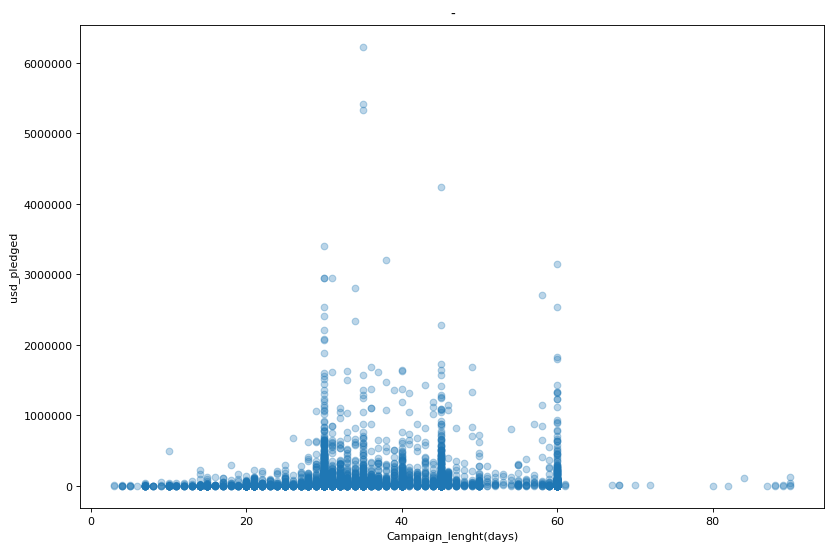

In [30]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

#usd_p = dftechSuccess['usd_pledged'])
CLvsUSDP = dftechSuccess[['usd_pledged', 'CL_int']]
USDP = dftechSuccess['usd_pledged']
CL_int = dftechSuccess['CL_int']

#CLvsUSDP.plot.scatter(CL_int, USDP) # Plot weekly_mean with subplots=True
#plt.show()
plt.scatter(CL_int, USDP, alpha=.3)

#plt.colorbar() # Add a color bar to the histogram
plt.xlabel('Campaign_lenght(days)') # Add labels, title, and display the plot
plt.ylabel('usd_pledged')
plt.title('-')
plt.show()


In [35]:
"""plt.hexbin(CL_int, USDP) # Generate a 2d histogram with hexagonal bins

plt.colorbar() # Add a color bar to the histogram
plt.xlabel('Campaign_lenght') # Add labels, title, and display the plot
plt.ylabel('usd_pledged')
plt.title('hexbin() plot')
plt.show()"""

"plt.hexbin(CL_int, USDP) # Generate a 2d histogram with hexagonal bins\n\nplt.colorbar() # Add a color bar to the histogram\nplt.xlabel('Campaign_lenght') # Add labels, title, and display the plot\nplt.ylabel('usd_pledged')\nplt.title('hexbin() plot')\nplt.show()"

In [32]:
# DONE: Export to CSV pour Alexis et Pauline
# dftech.to_csv('KS_clean_dataset_pour_gSHEET.csv')

In [33]:
dftech.head()

,created_at,backers_count,blurb,converted_pledged_amount,country,creator,currency,currency_symbol,currency_trailing_code,current_currency,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,usd_pledged,usd_type,Sub-category,Category,Campaign_lenght
7,2009-04-25,25,This is a project to create a free iPhone app ...,145,US,"{""id"":473191023,""name"":""Dan Phiffer"",""slug"":""d...",USD,$,True,USD,...,True,True,successful,2009-07-14,1.0,145.00,international,Software,technology,80 days
15,2009-04-29,98,I make cool icons for iPhone developers at htt...,1820,US,"{""id"":1948364894,""name"":""Joseph Wain"",""slug"":""...",USD,$,True,USD,...,True,True,successful,2009-06-15,1.0,1820.00,domestic,Software,technology,47 days
29,2009-05-06,14,Zombies. They're a problem that no one wants t...,700,US,"{""id"":1118670956,""name"":""Ryan J Budke"",""slug"":...",USD,$,True,USD,...,True,False,successful,2009-07-14,1.0,700.79,international,Software,technology,56 days
30,2009-05-07,2,I am an independent iPhone developer that beli...,6,US,"{""id"":1458953093,""name"":""Rob Zimmerman"",""is_re...",USD,$,True,USD,...,False,False,failed,2009-06-01,1.0,6.00,domestic,Software,technology,25 days
33,2009-05-12,0,The objective is to create a method of using s...,0,US,"{""id"":1368555524,""name"":""Michael Kaufman AIA (...",USD,$,True,USD,...,False,False,failed,2009-07-14,1.0,0.00,domestic,Software,technology,63 days


In [36]:
# Duplicate dftech with Ld = launch date as index to enable resampling
dftech_Ld_asIndex = dftechSuccess.reset_index() 
dftech_Ld_asIndex.set_index(dftechSuccess['launched_at'], inplace=True)

# Downsample to weakly and aggregate by median
dftech_Ld_resamp_week = dftech_Ld_asIndex.resample('1W').sum() 

# Drop les colonnes non essentielles
dftech_Ld_resamp_week.drop(columns=['index', 'converted_pledged_amount', 'fx_rate', 'currency_trailing_code', 'disable_communication', 'id', 'is_starrable', 'pledged', 'spotlight', 'staff_pick',
       'static_usd_rate', 'CL_int'], inplace=True)

dftech_Ld_resamp_week.tail(10)

,backers_count,goal,usd_pledged
launched_at,,,
2018-10-07,7320,203200.0,8.884352e+05
2018-10-14,8887,287750.0,1.087604e+06
2018-10-21,4636,387600.0,8.210488e+05
2018-10-28,8617,562700.0,1.426914e+06
2018-11-04,9077,484678.0,6.765192e+05
2018-11-11,1990,140399.0,2.571285e+05
2018-11-18,639,230851.0,1.218075e+05
2018-11-25,364,65000.0,2.276792e+05
2018-12-02,0,0.0,0.000000e+00


<Figure size 432x288 with 0 Axes>

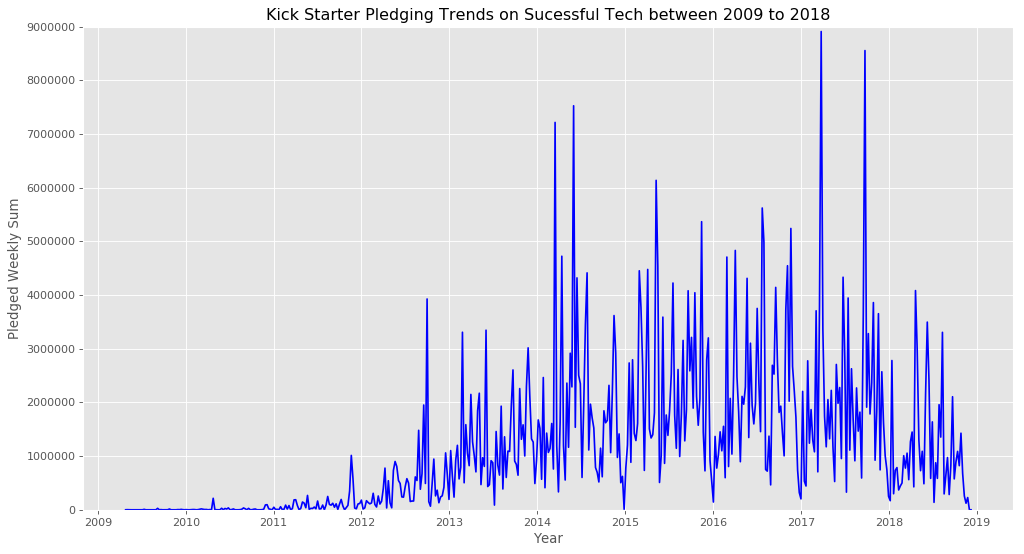

In [101]:
date = dftech_Ld_resamp_week.index
pledged = dftech_Ld_resamp_week['usd_pledged']

plt.clf()
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('ggplot') # Set the style to 'ggplot'
plt.ylim((0, 9000000))
plt.plot(date, pledged, color='blue')
plt.xlabel('Year') # Add axis labels and title
plt.ylabel('Pledged Weekly Sum')
plt.title('Kick Starter Pledging Trends on Sucessful Tech between 2009 to 2018')
plt.show()

<Figure size 432x288 with 0 Axes>

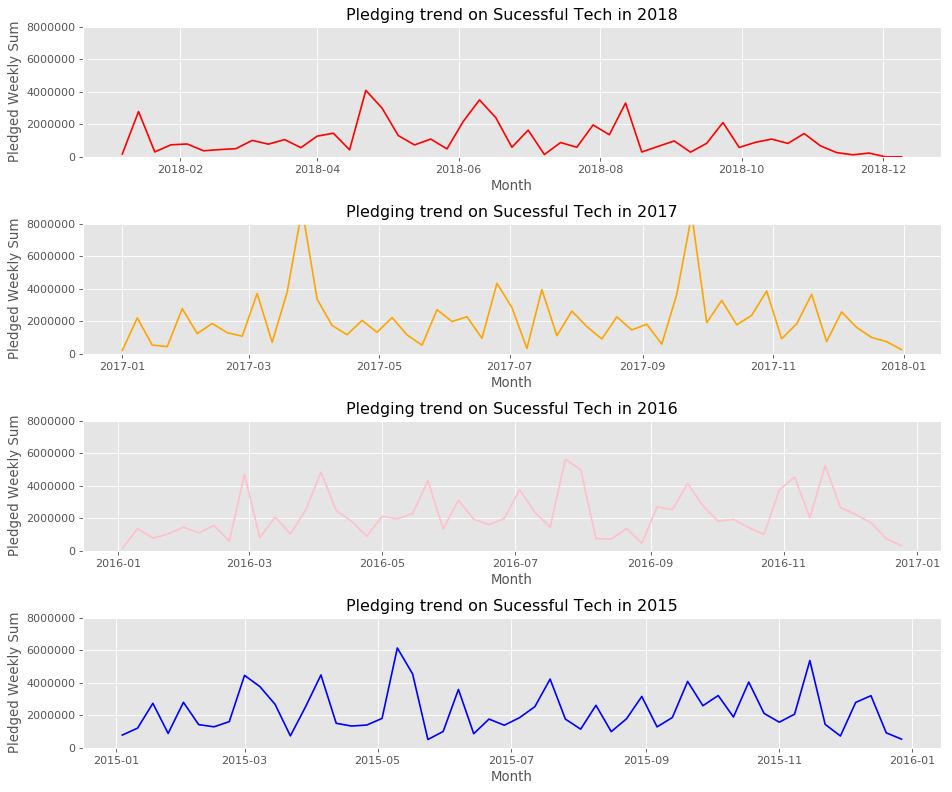

In [102]:
import calendar

# 2018
dftech_Ld_resamp_week_2018 = dftech_Ld_resamp_week.loc['2018']
date2018 = dftech_Ld_resamp_week_2018.index
pledged2018 = dftech_Ld_resamp_week_2018['usd_pledged']

# 2017
dftech_Ld_resamp_week_2017 = dftech_Ld_resamp_week.loc['2017']
date2017 = dftech_Ld_resamp_week_2017.index
pledged2017 = dftech_Ld_resamp_week_2017['usd_pledged']

# 2016
dftech_Ld_resamp_week_2016 = dftech_Ld_resamp_week.loc['2016']
date2016 = dftech_Ld_resamp_week_2016.index
pledged2016 = dftech_Ld_resamp_week_2016['usd_pledged']

# 2015
dftech_Ld_resamp_week_2015 = dftech_Ld_resamp_week.loc['2015']
date2015 = dftech_Ld_resamp_week_2015.index
pledged2015 = dftech_Ld_resamp_week_2015['usd_pledged']

plt.clf()
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('ggplot') # Set the style to 'ggplot'
plt.grid(True)

plt.subplot(4,1,1) # Create a figure with 4x1 subplot and make the left subplot (1) active
#plt.xlim(('01/01/2018','12/01/2018'))
plt.ylim((0, 8000000))
plt.plot(date2018, pledged2018, color='red')
plt.title('Pledging trend on Sucessful Tech in 2018')
plt.xlabel('Month') # Add axis labels and title
plt.ylabel('Pledged Weekly Sum')
#plt.xticks(date2018.resample('1M'), calendar.month_name[1:13], rotation=20)

plt.subplot(4,1,2) # Create a figure with 4x1 subplot and make the left subplot (2) active
plt.ylim((0, 8000000))
plt.plot(date2017, pledged2017, color='orange')
plt.title('Pledging trend on Sucessful Tech in 2017')
plt.xlabel('Month') # Add axis labels and title
plt.ylabel('Pledged Weekly Sum')

plt.subplot(4,1,3) # Create a figure with 4x1 subplot and make the left subplot (3) active
plt.ylim((0, 8000000))
plt.plot(date2016, pledged2016, color='pink')
plt.title('Pledging trend on Sucessful Tech in 2016')
plt.xlabel('Month') # Add axis labels and title
plt.ylabel('Pledged Weekly Sum')

plt.subplot(4,1,4) # Create a figure with 4x1 subplot and make the left subplot (4) active
plt.ylim((0, 8000000))
plt.plot(date2015, pledged2015, color='blue')
plt.title('Pledging trend on Sucessful Tech in 2015')
plt.xlabel('Month') # Add axis labels and title
plt.ylabel('Pledged Weekly Sum')

plt.tight_layout() # Improve spacing between subplots and display them
plt.show()

In [58]:
print('Total pledges in 2018: ', pledged2018.sum())
print('Total pledges in 2017: ', pledged2017.sum())
print('Total pledges in 2016: ', pledged2016.sum())
print('Total pledges in 2015: ', pledged2015.sum())

print('Delta 2018 vs 2017: ', pledged2017.sum() - pledged2018.sum())
#print(pledged2014.sum())
#print(pledged2013.sum())
#print(pledged2012.sum())
#print(pledged2011.sum())
#print(pledged2010.sum())
#print(pledged2009.sum())

Total pledges in 2018:  53027588.53333453
Total pledges in 2017:  112884792.09583022
Total pledges in 2016:  112850264.08779922
Total pledges in 2015:  116923943.7619779
Delta 2018 vs 2017:  59857203.562495686
